# Vorhersage von Aktienkursveränderungen

Seit Jahren nutzen Unternehmen öffentlich zugängliche Informationen, um Kursreaktionen an Aktienmärkten vorherzusagen. Nachrichten und Medienberichte rücken dabei immer mehr in den Vordergrund. Innovative Unternehmen wie z.B. [YukkaLab](https://www.yukkalab.com/) versprechen dabei z.B. die relevanten News für die Finanzbranche systematisch zu erfassen und Schwankungen am Aktienmarkt zu prognostizieren.

Im Rahmen des Assignment werden entsprechende Vorhersagemodelle entwickelt, die mithilfe von News-Meldungen Kursveränderungen vorhersagen. Ziel ist es, abschätzen zu können, ob entsprechende Vorhersagemodelle realistisch erscheinen. Kursschwankungen von Aktien unterliegen ja einer Vielzahl von Einflüssen, die Veränderungen oftmals zufällig erscheinen lassen.

Sie wollen nun ein Prognosemodell zum Intra-Day-Trading entwickeln und haben sich einen Web-Crawler gebaut, der historische Börsenkurse und die 25 am häufigsten gelikten Reddit-Nachrichten pro Kalendertag, bzw. deren Titel / Headline sammelt. Die Reddit-Daten haben Sie bereits einer Sentiment-Analyse unterzogen (je grösser die Polarität, desto positiver war die Stimmung an diesem Tag).

Im Detail haben Sie folgende Features zur Verfügung, "daily_movement_binary" ist das Target.

|Feature|Beschreibung|
|---|---|
|daily_movement_binary|Entwicklung des Aktionkurses am Ende des Prognosetages|
|Open|Eröffnungspreis am Prognosetag|
|High|Tageshöchststand am Prognosetag|
|Close|Endstand am Prognosetag|
|Adj Close|Angepasster Endstand am Prognosetag|
|Low|Tagestiefststand am Prognosetag|
|Volumen|Handelsvolumen am Prognosetag|
|Polarity_1|Sentiment der Newsmeldungen auf Reddit am Vortag des Prognosetages|
|Polarity_2|Sentiment der Newsmeldungen auf Reddit 2 Tage vor dem Prognosetag|
|Polarity_3|Sentiment der Newsmeldungen auf Reddit 3 Tage vor dem Prognosetag|
|Polarity_4|Sentiment der Newsmeldungen auf Reddit 4 Tage vor dem Prognosetag|
|Polarity_5|Sentiment der Newsmeldungen auf Reddit 5 Tage vor dem Prognosetag|
|Polarity_6|Sentiment der Newsmeldungen auf Reddit 6 Tage vor dem Prognosetag|
|Polarity_7|Sentiment der Newsmeldungen auf Reddit 7 Tage vor dem Prognosetag|
|Open_1|Eröffnungspreis am Vortag des Prognosetages|
|Open_2|Eröffnungspreis 2 Tage vor dem Prognosetag|
|Open_3|Eröffnungspreis 3 Tage vor dem Prognosetag|
|Open_4|Eröffnungspreis 4 Tage vor dem Prognosetag|
|Open_5|Eröffnungspreis 5 Tage vor dem Prognosetag|
|Open_6|Eröffnungspreis 6 Tage vor dem Prognosetag|
|Open_7|Eröffnungspreis 7 Tage vor dem Prognosetag|

## 1) Lesen Sie das Datenset ein. Wandeln sie das Target in eine numerische Variable um. Wandeln Sie alle Features in Floats um.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import pandas show information about dataset
import pandas as pd

# read dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Business Analytics/Assignment 2/dowjones_reddit_nan.csv")

# show information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   369 non-null    float64
 1   High                   369 non-null    float64
 2   Low                    369 non-null    float64
 3   Close                  169 non-null    float64
 4   Adj Close              169 non-null    float64
 5   Volume                 369 non-null    int64  
 6   daily_movement_binary  369 non-null    object 
 7   Open_1                 369 non-null    float64
 8   Polarity_1             369 non-null    float64
 9   Open_2                 369 non-null    float64
 10  Polarity_2             369 non-null    float64
 11  Open_3                 369 non-null    float64
 12  Polarity_3             369 non-null    float64
 13  Open_4                 369 non-null    float64
 14  Polarity_4             369 non-null    float64
 15  Open_5

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_movement_binary,Open_1,Polarity_1,Open_2,...,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7,Day
0,17645.01953,17923.00977,17498.23047,NaN,NaN,99360000,down,17742.05078,-3.550856,17911.01953,...,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832,7
1,17609.06055,17609.06055,17264.90039,17427.08984,17427.08984,109180000,down,17645.01953,-3.089996,17742.05078,...,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,8
2,17436.30078,17517.41016,17298.03906,NaN,NaN,94520000,down,17609.06055,-6.729233,17645.01953,...,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,9
3,17320.00000,17528.36914,17243.55078,17511.57031,17511.57031,140480000,up,17436.30078,-0.334698,17609.06055,...,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,10
4,17516.96094,17588.69922,17346.73047,NaN,NaN,119600000,down,17320.00000,-1.855250,17436.30078,...,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,11


Bei der Betrachtung des Datensatzes wird deutlich, dass alle Merkmale ausser daily_movement_binary numerische Variablen sind. Um die Aufgabe zu erfüllen, ändern wir diese Features nun in die binären Werte 0 und 1.

In [ ]:
# add binary values 1 up 0
df["daily_movement_binary"] = df["daily_movement_binary"].replace({"up": 1, "down": 0})

# show head of adjusted dataset
df["daily_movement_binary"].head()

0    0
1    0
2    0
3    1
4    0
Name: daily_movement_binary, dtype: int64

Die erste Teilaufgabe ist erledigt, jetzt ändern wir alle Merkmale in floats um, da wir oben gesehen haben, dass es im Dataset auch Integers gibt. Gleichzeitig sortieren wir die Werte nach dem Feature Day, um sicherzustellen, dass der Datensatz für die nächste Aufgabe sortiert ist.


In [ ]:
# change features to float and sort by day
df = df.astype(float).sort_values(by="Day")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 368
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   369 non-null    float64
 1   High                   369 non-null    float64
 2   Low                    369 non-null    float64
 3   Close                  169 non-null    float64
 4   Adj Close              169 non-null    float64
 5   Volume                 369 non-null    float64
 6   daily_movement_binary  369 non-null    float64
 7   Open_1                 369 non-null    float64
 8   Polarity_1             369 non-null    float64
 9   Open_2                 369 non-null    float64
 10  Polarity_2             369 non-null    float64
 11  Open_3                 369 non-null    float64
 12  Polarity_3             369 non-null    float64
 13  Open_4                 369 non-null    float64
 14  Polarity_4             369 non-null    float64
 15  Open_5

## 2) Erstellen Sie Test- und Trainingsdaten. Die Trainingsdaten sollten 78% der verfügbaren Instanzen umfassen. Die Daten sind zeitlich geordnet. Die letzten 22% sollen die Testdaten darstellen.

Wir teilen das Dataset in einen Trainingset mit 78 % der Instanzen und einen Testset mit 22 % der Instanzen auf. Um die Reihenfolge des Datensatzes beizubehalten, wird der Datensatz beim train_test_split nicht gemischt (shuffle).

In [ ]:
# import
from sklearn.model_selection import train_test_split

# define X and target y
y = df["daily_movement_binary"]
X = df.drop("daily_movement_binary", axis=1)

# split into train and test data, keep order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, shuffle = False)

Da der gesamte Datensatz 369 entries umfasst, sollte das Testset theoretisch 81.2 -> 82 Einträge enthalten.

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 287 to 368
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        82 non-null     float64
 1   High        82 non-null     float64
 2   Low         82 non-null     float64
 3   Close       44 non-null     float64
 4   Adj Close   44 non-null     float64
 5   Volume      82 non-null     float64
 6   Open_1      82 non-null     float64
 7   Polarity_1  82 non-null     float64
 8   Open_2      82 non-null     float64
 9   Polarity_2  82 non-null     float64
 10  Open_3      82 non-null     float64
 11  Polarity_3  82 non-null     float64
 12  Open_4      82 non-null     float64
 13  Polarity_4  82 non-null     float64
 14  Open_5      82 non-null     float64
 15  Polarity_5  82 non-null     float64
 16  Open_6      82 non-null     float64
 17  Polarity_6  82 non-null     float64
 18  Open_7      82 non-null     float64
 19  Polarity_7  82 non-null     

## 3) Ihnen ist aufgefallen, dass ihr WebCrawler fehlerhaft ist und "missing values" produziert. Untersuchen Sie welche Features betroffen sind. Welche würden Sie mit einem geeigneten Verfahren imputieren und welche würden Sie löschen?

Als erstes wird untersucht, wo sich die NaN values im Dataset befinden.

In [ ]:
# sum NaN values
missing_values = df.isna().sum()
missing_values

Open                       0
High                       0
Low                        0
Close                    200
Adj Close                200
Volume                     0
daily_movement_binary      0
Open_1                     0
Polarity_1                 0
Open_2                     0
Polarity_2                 0
Open_3                     0
Polarity_3                 0
Open_4                     0
Polarity_4                 0
Open_5                     0
Polarity_5                 0
Open_6                     0
Polarity_6                 0
Open_7                     0
Polarity_7                 0
Day                        0
dtype: int64

Bevor wir das Problem der missing values beheben, prüfen wir, ob es Features gibt, die aus dem Datensatz gelöscht werden können.


In [ ]:
# correlation
df.corr()

,Open,High,Low,Close,Adj Close,Volume,daily_movement_binary,Open_1,Polarity_1,Open_2,...,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7,Day
Open,1.000000,0.988466,0.983790,0.956590,0.956590,-0.375730,-0.117213,0.968324,0.055753,0.937847,...,0.070060,0.882716,0.089814,0.859772,0.077014,0.839301,0.070389,0.820749,0.063582,-0.291586
High,0.988466,1.000000,0.988534,0.982982,0.982982,-0.375934,-0.020307,0.960843,0.064640,0.938736,...,0.081018,0.890618,0.082298,0.869211,0.070615,0.850281,0.064434,0.831292,0.062946,-0.302930
Low,0.983790,0.988534,1.000000,0.988403,0.988403,-0.436603,-0.008138,0.946511,0.045453,0.914296,...,0.084148,0.858933,0.084745,0.835912,0.073664,0.816583,0.067807,0.795591,0.068814,-0.276520
Close,0.956590,0.982982,0.988403,1.000000,1.000000,-0.389441,0.102942,0.914864,0.045068,0.884114,...,-0.011657,0.829102,0.028061,0.812955,0.032384,0.791045,-0.011796,0.768126,-0.006161,-0.209868
Adj Close,0.956590,0.982982,0.988403,1.000000,1.000000,-0.389441,0.102942,0.914864,0.045068,0.884114,...,-0.011657,0.829102,0.028061,0.812955,0.032384,0.791045,-0.011796,0.768126,-0.006161,-0.209868
Volume,-0.375730,-0.375934,-0.436603,-0.389441,-0.389441,1.000000,-0.098789,-0.337906,0.073546,-0.311839,...,-0.021751,-0.281207,-0.028513,-0.258182,-0.050774,-0.258599,-0.105423,-0.239635,-0.043726,0.064054
daily_movement_binary,-0.117213,-0.020307,-0.008138,0.102942,0.102942,-0.098789,1.000000,-0.100766,0.032051,-0.090594,...,0.056046,-0.084235,-0.111900,-0.086328,-0.064739,-0.087171,0.007226,-0.080866,0.040636,0.071115
Open_1,0.968324,0.960843,0.946511,0.914864,0.914864,-0.337906,-0.100766,1.000000,0.082658,0.968492,...,0.062329,0.910515,0.069177,0.883006,0.090303,0.860266,0.075692,0.839789,0.069868,-0.293530
Polarity_1,0.055753,0.064640,0.045453,0.045068,0.045068,0.073546,0.032051,0.082658,1.000000,0.090438,...,0.061292,0.098559,0.003068,0.079048,-0.034781,0.096497,0.027320,0.078443,0.007577,-0.075897
Open_2,0.937847,0.938736,0.914296,0.884114,0.884114,-0.311839,-0.090594,0.968492,0.090438,1.000000,...,0.053164,0.938759,0.063274,0.911404,0.070972,0.884433,0.089097,0.861682,0.074103,-0.294687


In [ ]:
# correlation of Close and Adj Close
df.corr().loc["Close","Adj Close"]

1.0

Es fällt auf, dass Adj Close und Close eine perfekte positive Korrelation aufweisen. Um Multikollinearität zu vermeiden, streichen wir eine Variable. Wir entscheiden uns für den Adj Close Price, da dieser einen höheren Informationsgehalt hat als der Close Preis. Adj Close beinhaltet noch corporate actions wie Dividenden oder Splits die Einfluss auf den Preis haben.

Quelle: https://www.investopedia.com/terms/a/adjusted_closing_price.asp


In [ ]:
# drop Close in all dataframes
df.drop("Close", axis=1, inplace = True)
X_train.drop("Close", axis=1, inplace = True)
X_test.drop("Close", axis=1, inplace = True)

In [ ]:
X_train.head()

,Open,High,Low,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7,Day
0,17645.01953,17923.00977,17498.23047,NaN,99360000.0,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832,7.0
1,17609.06055,17609.06055,17264.90039,17427.08984,109180000.0,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,8.0
2,17436.30078,17517.41016,17298.03906,NaN,94520000.0,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,9.0
3,17320.00000,17528.36914,17243.55078,17511.57031,140480000.0,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,10.0
4,17516.96094,17588.69922,17346.73047,NaN,119600000.0,17320.00000,-1.855250,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,11.0


Wir werden nun die fehlenden Werte für das Feature Adj Close berechnen. Dazu verwenden wir die KNN-Methode. Der fehlende Wert wird auf der Grundlage des Mittelwerts der Nachbarn ermittelt. Eine vollständige Löschung der fehlenden Daten kommt nicht in Frage, da wertvolle Informationen verloren gehen würden und die Anzahl der NaN Werte mit 200 von 369 möglichen Einträgen sehr hoch ist. Durch den Einsatz von KNN erhoffen wir uns eine besseres Erkennen von Patterns als mit einer einfachen Mittelwert imputation.

In [ ]:
# import
from sklearn.impute import KNNImputer

# impute missing values with KNN on training data
imputer = KNNImputer()
imputer.fit(X_train)
df_imputed = imputer.transform(X_train)

# create a new dataframe with imputed values
names = imputer.feature_names_in_
df_imputed = pd.DataFrame(df_imputed, columns=names)

df_imputed

,Open,High,Low,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7,Day
0,17645.01953,17923.00977,17498.23047,17550.431642,99360000.0,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832,7.0
1,17609.06055,17609.06055,17264.90039,17427.089840,109180000.0,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,8.0
2,17436.30078,17517.41016,17298.03906,17693.681640,94520000.0,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,9.0
3,17320.00000,17528.36914,17243.55078,17511.570310,140480000.0,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,10.0
4,17516.96094,17588.69922,17346.73047,17075.687696,119600000.0,17320.00000,-1.855250,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,16712.69922,16795.98047,16623.91016,17550.431642,98480000.0,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,16483.75977,-3.594815,16217.98047,-3.783587,289.0
283,16634.15039,16726.11914,16510.40039,17334.567772,126220000.0,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,16483.75977,-3.594815,290.0
284,16545.66992,16865.56055,16545.66992,17580.814062,105050000.0,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,291.0
285,16851.16992,16900.16992,16766.32031,17550.812110,104470000.0,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,292.0


Unten sehen wir, dass es keine NaN Werte mehr gibt:

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        287 non-null    float64
 1   High        287 non-null    float64
 2   Low         287 non-null    float64
 3   Adj Close   287 non-null    float64
 4   Volume      287 non-null    float64
 5   Open_1      287 non-null    float64
 6   Polarity_1  287 non-null    float64
 7   Open_2      287 non-null    float64
 8   Polarity_2  287 non-null    float64
 9   Open_3      287 non-null    float64
 10  Polarity_3  287 non-null    float64
 11  Open_4      287 non-null    float64
 12  Polarity_4  287 non-null    float64
 13  Open_5      287 non-null    float64
 14  Polarity_5  287 non-null    float64
 15  Open_6      287 non-null    float64
 16  Polarity_6  287 non-null    float64
 17  Open_7      287 non-null    float64
 18  Polarity_7  287 non-null    float64
 19  Day         287 non-null    f

## 4) Traineren Sie eine logistische Regression. Bestimmen Sie Precision, Recall und AUC, um die Generalisierbarkeit Ihrer Vorhersagen evaluieren zu können. Was bedeuten diese Kennzahlen im vorliegenden Kontext?

In [ ]:
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)
print(X_train.shape)
print(df_imputed.shape)

(82,)
(287,)
(82, 20)
(287, 20)
(287, 20)


In [ ]:
# import
import statsmodels.api as sm

# instantiate model on imputed train data
model  = sm.Logit(y_train, sm.add_constant(df_imputed))

# fit model
logreg = model.fit()

# results
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.282754
         Iterations 8
                             Logit Regression Results                            
Dep. Variable:     daily_movement_binary   No. Observations:                  287
Model:                             Logit   Df Residuals:                      266
Method:                              MLE   Df Model:                           20
Date:                   Wed, 15 Nov 2023   Pseudo R-squ.:                  0.5920
Time:                           10:55:32   Log-Likelihood:                -81.150
converged:                          True   LL-Null:                       -198.89
Covariance Type:               nonrobust   LLR p-value:                 9.532e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2175     13.030      0.017      0.987     -25.320      25.755
Open 

Die Variablen High und Low sind statistisch signifikant und haben positive Koeffizienten, was darauf hindeutet, dass höhere Werte dieser Variablen die Wahrscheinlichkeit erhöhen, dass die Aktienmärkte sich positiv/up entwicklen.

Die Variable Open ist auch statistisch signifikant, hat aber einen negativen Koeffizienten (-0.0459). Was heisst, dass bei einem höheren Open Price die Wahrscheinlichkeit abnimmt, dass die Aktienkurse sich positv/up entwickeln.

Mit einem R-squared von 0.592 ist das Modell besser als der Zufall.



In [ ]:
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns = names, index=X_test.index)

In [ ]:
X_test_imputed

,Open,High,Low,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7,Day
287,16945.00000,17062.38086,16898.83984,17631.577736,106910000.0,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,294.0
288,16991.28906,17099.25000,16940.48047,17627.537892,100290000.0,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,295.0
289,17050.66992,17072.78906,16921.50977,16964.099610,108380000.0,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,296.0
290,16969.16992,17048.50000,16947.93945,17649.587890,116690000.0,17050.66992,-1.277540,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,297.0
291,17006.05078,17130.10938,16821.85938,16995.130860,117570000.0,16969.16992,-2.922243,17050.66992,-1.277540,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,17844.10938,18011.07031,17844.10938,18011.070310,98070000.0,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250,17710.76953,-3.418198,371.0
365,17946.63086,17946.63086,17356.33984,17400.750000,239000000.0,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250,372.0
366,17355.21094,17355.21094,17063.08008,17140.240230,138740000.0,17946.63086,0.366238,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,373.0
367,17190.50977,17409.72070,17190.50977,17409.720700,112190000.0,17355.21094,-0.356534,17946.63086,0.366238,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,374.0


In [ ]:
# import
from sklearn.metrics import precision_score, recall_score,roc_auc_score, confusion_matrix, accuracy_score

# predict on test
y_test_pred = logreg.predict(sm.add_constant(X_test_imputed))

# change to binary class
y_test_predclass = (y_test_pred > 0.5 ).astype(int)

# calcualte and print confusion matrix, precision, accuracy, recall, and AUC
print(f' Confusion Matrix:\n\n {confusion_matrix(y_test, y_test_predclass)}\n')
print("Precision:", precision_score(y_test, y_test_predclass))
print("Accuracy:", accuracy_score(y_test, y_test_predclass))
print("Recall:", recall_score(y_test, y_test_predclass))
print("AUC:", roc_auc_score(y_test, y_test_pred))

 Confusion Matrix:

 [[27  6]
 [ 7 42]]

Precision: 0.875
Accuracy: 0.8414634146341463
Recall: 0.8571428571428571
AUC: 0.937538651824366


Mit einer Precision von 87.5% liegt das Modell in den allermeisten Fällen richtig, wenn es sagt das sich der Aktienkurs up entwickelt (daily_movement_binary = 1).

Der Recall berechnet, wie viele der tatsächlichen Positiven (up) unseres Modell durch die Vorhersage als positiv/up (True Positive) erfasst wurden. Mit einem Wert von 85.71% ist der Anteil sehr hoch und unser Modell erfasst ein gross Teil aller True Positives.


Die AUC (area under the curve) ist die Fläche unter der ROC-Kurve und bewertet die Performance des Modells über verschiedene Schwellenwerte hinweg. Sie misst, wie gut das Modell in der Lage ist, zwischen positiven und negativen Fällen zu unterscheiden, wenn man verschiedene Schwellenwerte für die Vorhersagen verwendet. Der AUC-Wert liegt zwischen 0 und 1, wobei ein Wert nahe 1 auf ein sehr gutes Modell hindeutet. Je höher der Wert ist, desto besser kann unser Modell die Klasse up (1) als Klasse up (1), und die Klasse down (0) als down vorhersagen. Im vorliegenden Fall ist der AUC-Wert 0.937, was auf eine ausgezeichnete Modellleistung hinweist. Dies ist auch in der Grafik unten ersichtlich, wo die ROC Kurve weit von der diagonalen entfernt ist.

Source:

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


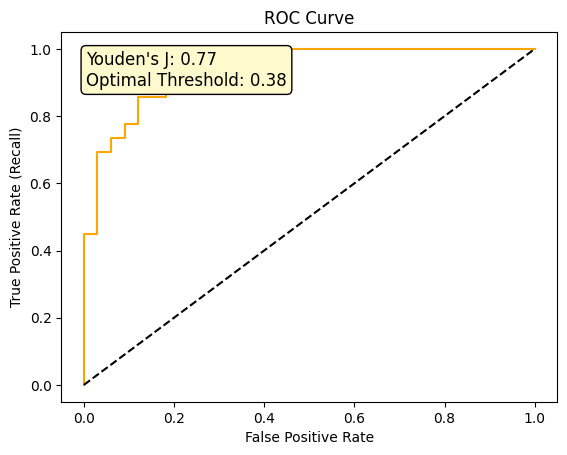

In [ ]:
# import
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# calculate fpr and tpr values on test
fpr1, tpr1, thresholds = roc_curve(y_test, y_test_pred)

# create plot
fig, ax = plt.subplots()

# plot roc, fpr on x-axis, tpr on y-axis
ax.plot(fpr1, tpr1, color="orange")
# add diagonal baseline
ax.plot([0,1],[0,1], "--", color="black")

# set title and labels
ax.set_title("ROC Curve")
ax.set_ylabel("True Positive Rate (Recall)")
ax.set_xlabel("False Positive Rate")

# predict on train
y_train_pred = logreg.predict(sm.add_constant(df_imputed))
# calculate fpr and tpr values on train
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# maximize difference between tpr, fpr
J = tpr - fpr
# get value of the index with the maximum value in J array
optimal_threshold = thresholds[np.argmax(J)]

# create box with J and Optimal Threshold
text = f"Youden\'s J: {np.max(J):.2f}\nOptimal Threshold: {optimal_threshold:.2f}"
style = dict(boxstyle='round', facecolor="lemonchiffon")
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=12, verticalalignment="top", bbox=style)

# show
plt.show()

## 5)  Die Erbnisse erscheinen Ihnen zu gut... Sie kommen zu dem Schluss, dass einige der Features im Modell einen Recht hohen Bezug zum Target haben könnten und deren finalen Werte erst vorliegen, wenn man bereits weiss, ob sich der Aktienkurs hoch oder runter entwickelt hat. Welche illegitimen Features werden in dem Model verwendet? Löschen Sie diese

Werfen wir noch einmal einen Blick auf alle Merkmale des Datensets:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 368
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   369 non-null    float64
 1   High                   369 non-null    float64
 2   Low                    369 non-null    float64
 3   Adj Close              169 non-null    float64
 4   Volume                 369 non-null    float64
 5   daily_movement_binary  369 non-null    float64
 6   Open_1                 369 non-null    float64
 7   Polarity_1             369 non-null    float64
 8   Open_2                 369 non-null    float64
 9   Polarity_2             369 non-null    float64
 10  Open_3                 369 non-null    float64
 11  Polarity_3             369 non-null    float64
 12  Open_4                 369 non-null    float64
 13  Polarity_4             369 non-null    float64
 14  Open_5                 369 non-null    float64
 15  Polari

Bei den Features Open, High, Low, Adj Close und Volume handelt es sich um Informationen, die während des Prognosetages gesammelt werden und daher zu Beginn des Tages nicht verfügbar sind. Open wurde entfernt, da wir davon ausgehen, dass wir das Modelle vor Marktöffnung anwenden um zu predicten ob der Markt über den ganzen Tag up or down geht und bei der Öffnung investieren.
Wir werden nun einen realistischeren Datensatz ohne diese Werte erstellen.


In [ ]:
# create new dataset
df_adj = df.copy()
# drop features
df_adj.drop(["Open", "High","Low","Adj Close","Volume"], axis=1, inplace = True)

In [ ]:
df_adj

,daily_movement_binary,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7,Day
0,0.0,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832,7.0
1,0.0,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,8.0
2,0.0,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,9.0
3,1.0,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,10.0
4,0.0,17320.00000,-1.855250,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1.0,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250,17710.76953,-3.418198,371.0
365,0.0,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250,372.0
366,0.0,17946.63086,0.366238,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,373.0
367,1.0,17355.21094,-0.356534,17946.63086,0.366238,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,374.0


## 6)  Wiederholen Sie die logistische Regression und vergleichen Sie die Ergebnisse? Beurteilen Sie die Qualität des Modells und dessen potenzielle Nützlichkeit für den Erfolg des Modells. Was ist der Grund für den Rückgang an Vorhersagegenauigkeit?

In [ ]:
# import
import statsmodels.api as sm

# define X and y
y = df_adj["daily_movement_binary"]
X = df_adj.drop("daily_movement_binary", axis=1)

# training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle = False)

# instantiate model on imputed train data
model  = sm.Logit(y_train, sm.add_constant(X_train))

# fit model
logreg_adj = model.fit()

# results
print(logreg_adj.summary())

Optimization terminated successfully.
         Current function value: 0.669049
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     daily_movement_binary   No. Observations:                  287
Model:                             Logit   Df Residuals:                      271
Method:                              MLE   Df Model:                           15
Date:                   Wed, 15 Nov 2023   Pseudo R-squ.:                 0.03455
Time:                           10:55:33   Log-Likelihood:                -192.02
converged:                          True   LL-Null:                       -198.89
Covariance Type:               nonrobust   LLR p-value:                    0.5449
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0571      4.562      1.985      0.047       0.116      17.998
Open_

Der R-squared des Modells ist mit einem Wert von 0.03455 sehr tief und bis auf die Konstante weist keine Variable statistische Signifikanz auf.

In [ ]:
# import
from sklearn.metrics import precision_score, recall_score,roc_auc_score, confusion_matrix, accuracy_score

# predict on test
y_test_pred = logreg_adj.predict(sm.add_constant(X_test))

# change to binary class
y_test_predclass = (y_test_pred > 0.5).astype(int)

# calcualte and print confusion matrix, precision, accuracy, recall, and AUC
print(f"Confusion Matrix:\n\n {confusion_matrix(y_test, y_test_predclass)}\n")
print("Precision:", precision_score(y_test, y_test_predclass))
print("Accuracy:", accuracy_score(y_test, y_test_predclass))
print("Recall:", recall_score(y_test, y_test_predclass))
print("AUC:", roc_auc_score(y_test, y_test_pred))

Confusion Matrix:

 [[30  3]
 [42  7]]

Precision: 0.7
Accuracy: 0.45121951219512196
Recall: 0.14285714285714285
AUC: 0.5176252319109462


Mit einer Precision von 70 % ist das Modell in den meisten Fällen richtig, wenn es vorhersagt, dass sich der Aktienkurs up entwickelt (daily_movement_binary = 1). Die Precision hat jedoch um 17.5 % abgenommen im Vergleich zum vorherigen Modell.

Mit einem Wert von 14.29 % hat sich der Recall deutlich verschlechtert. Es wurde also nur ein sehr kleiner Teil aller True Positiv entdeckt. Wenn das Modell die True Positive entdeckt, liegt es jedoch meistens richtig in der Vorhersage (siehe Precision).


Die AUC hat einen Wert von 0.517 und ist damit deutlich schlechter im Vergleich zum vorherigen Modell (-0.42). Ein AUC (Area Under the Curve) von 0.5 bedeutet, dass die Fähigkeit des Modells, zwischen positiven und negativen Fällen zu unterscheiden, nicht besser als der Zufall ist. Mit anderen Worten, das Modell ist nicht in der Lage, Vorhersagen zu treffen.

Visuell bedeutet eine AUC von 0.5 , dass die ROC-Kurve des Modells eine diagonale Linie ist, was heisst, dass das Modell nicht zwischen den beiden Klassen unterscheiden kann. Die ROC Kurve unseres Modells liegt ganze Nahe bei der diagonalen Linie, was darauf hinweist, dass es kein sehr gutes Modell ist (siehe erste Grafik unten). Die Berechnung zeigt uns, dass es nur ganz leicht besser ist als der Zufall.

Wenn wir die ROC Kurven des ersten und zweiten Modells übereinander legen (siehe zweite Grafik unten), ist  ersichtlich, dass unser zweites Modell deutlich schlechter ist als das erste.


Zusammenfassend lässt sich sagen, dass das Modell zwar eine gewisse Genauigkeit bei der Vorhersage eines Anstiegs der Aktienkurse aufweist (Precision), seine Gesamteffektivität angesichts des niedrigen Recalls und AUC jedoch fragwürdig ist. Das Modell ist bei den Vorhersagen nur geringfügig besser als der Zufall.


Der Grund für die Verschlechterung des Modells sind die fehlenden Variablen Open, High, Low und Adj Close, die in unserem ersten Modell alle sehr statistisch signifikant waren. Diese Informationen fehlen nun und haben einen negativen Einfluss auf die Vorhersagekraft unseres neuen Modells.

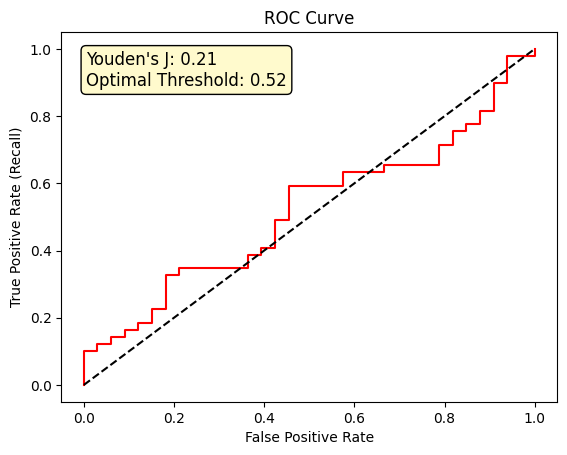

In [ ]:
# import
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# calculate fpr and tpr values on test
fpr2, tpr2, thresholds = roc_curve(y_test, y_test_pred)

# create plot
fig, ax = plt.subplots()

# plot roc, fpr on x-axis, tpr on y-axis
ax.plot(fpr2, tpr2, color="red")
# add diagonal baseline
ax.plot([0,1],[0,1], "--", color="black")

# set title and labels
ax.set_title("ROC Curve")
ax.set_ylabel("True Positive Rate (Recall)")
ax.set_xlabel("False Positive Rate")

# predict on train
y_train_pred = logreg_adj.predict(sm.add_constant(X_train))
# calculate fpr and tpr values on train
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# maximize difference between tpr, fpr
J = tpr - fpr
# get value of the index with the maximum value in J array
optimal_threshold = thresholds[np.argmax(J)]

# create box with J and Optimal Threshold
text = f"Youden\'s J: {np.max(J):.2f}\nOptimal Threshold: {optimal_threshold:.2f}"
style = dict(boxstyle='round', facecolor="lemonchiffon")
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=12, verticalalignment="top", bbox=style)

# show
plt.show()

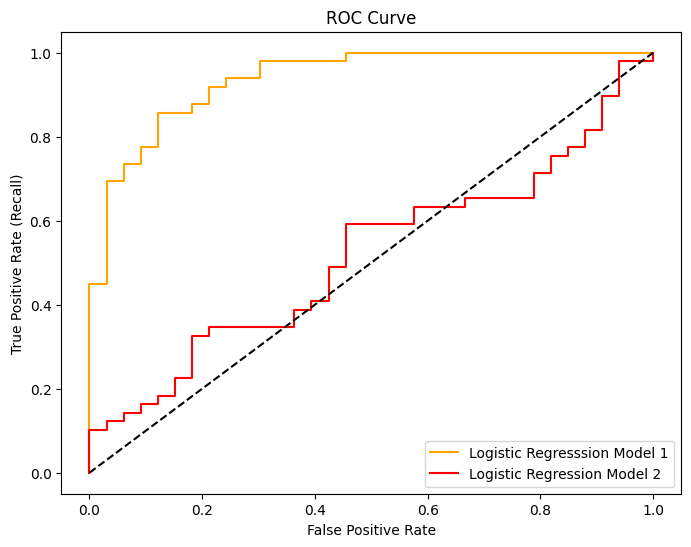

In [ ]:
# import
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# create plot
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# plot roc,fpr for both models
ax.plot(fpr1, tpr1, color="orange",label="Logistic Regresssion Model 1")
ax.plot(fpr2, tpr2, color="red",label="Logistic Regression Model 2")

# add diagonal baseline
ax.plot([0,1],[0,1], "--", color="black")

# set title and labels
ax.set_title("ROC Curve")
ax.set_ylabel("True Positive Rate (Recall)")
ax.set_xlabel("False Positive Rate")
ax.legend()

# show
plt.show()

## 7)  Trainieren Sie einen Random Forest Classifier mit 750 Bäumen und vergleichen Sie die Vorhersagegenauigkeit mit der Logistischen Regression.

In [ ]:
# import
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,roc_auc_score, confusion_matrix, accuracy_score

# instantiate model
model  = RandomForestClassifier(n_estimators=750, random_state = 42)

# fit model
randomforest = model.fit(X_train,y_train)

# predict on test
y_test_pred = randomforest.predict_proba(X_test)[:, 1]

# change to binary class
y_test_predclass = randomforest.predict(X_test)

# calcualte and print confusion matrix, precision, accuracy, recall, and AUC
print(f' Confusion Matrix:\n\n {confusion_matrix(y_test, y_test_predclass)}\n')
print("Precision:", precision_score(y_test, y_test_predclass))
print("Accuracy:", accuracy_score(y_test, y_test_predclass))
print("Recall:", recall_score(y_test, y_test_predclass))
print("AUC:", roc_auc_score(y_test, y_test_pred))

 Confusion Matrix:

 [[22 11]
 [27 22]]

Precision: 0.6666666666666666
Accuracy: 0.5365853658536586
Recall: 0.4489795918367347
AUC: 0.5525664811379097




Das random forest Modell hat eine leicht schlechtere Precsion (66.67%) als die logistische Regression (70%). Dafür aber einen deutlich höheren Recall (44.9% vs. 14.3%). Die AUC hat sich leicht verbessert auf 0.5526 von 0.5176 (+0.035).

Zusammenfassend lässt sich sagen, dass das random forest Modell im Vergleich zum logistischen Regressionsmodell eine Verbesserung des Recalls und der AUC aufweist, obwohl die Precision leicht abnimmt. Die Verbesserung des Recalls ist besonders bemerkenswert, da sie auf eine bessere Fähigkeit hinweist, die  positiven Fälle zu identifizieren. Die etwas höhere AUC deutet auch auf eine insgesamt bessere Leistung des Modells in Bezug auf die ROC-Analyse hin.

## 8) Erstellen Sie einen Variable Importance Plot. Was sind die wichtigsten Variablen? Vergleichen Sie diese Ergebnisse, mit den Ergebnissen der Logistischen Ergebnisse! Stimmen die Ergebnisse überein? Wie gehen Sie mit etwaigen Inkonsistenzen um?

In [ ]:
### function to plot variable importance ###
def plot_variable_importance(model, X_train):

    # import
    import matplotlib.pyplot as plt
    from pandas import DataFrame

    # sort feature importances and create a dataframe
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)

    # create plot
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=100)

    # create horizontal bar plot with names and importance
    ax.barh(imp["names"],imp["imp"], color="orange")

    # set labels and title
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n')
    ax.set_title('Variable Importance Plot\n')

    # show
    plt.show()

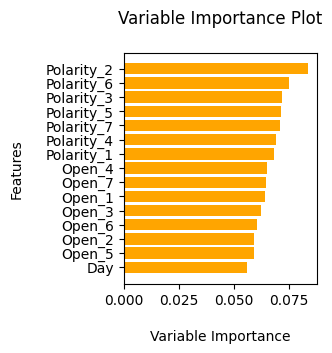

In [ ]:
plot_variable_importance(randomforest, X_train)

**Beobachtung:**

Es ist deutlich zu erkennen, dass die Werte aus der Sentiment Analyse der Reddit-Nachrichten (Polarity_) wichtiger sind als die Eröffnungskurse der Vortage (Open_). Das Sentiment der Nachrichtenmeldung 2 Tage vor dem Prognosetag ist das wichtigste und überraschenderweise ist das Sentiment vom Vortag das unwichtigste von allen Sentiments. Bei den Eröffnungskursen ist der Kurs 4 Tage vor dem Prognosetag am wichtigsten.

Die wichtigsten Variabeln sind:


*   Polarity_2
*   Polarity_6
*   Polarity_3

**Vergleich:**

Im logistischen Regressionsmodell war keine der Variablen Polayrity oder Open auf dem Niveau von 0.05 statistisch signifikant, was darauf hindeutet, dass sie keine starke lineare Beziehung zum Target (daily_movement_binary) haben.

Das random forest Modell identifiziert die Variabeln Polarity als wichtiger als die Variabeln Open, was darauf hindeutet, dass diese Variablen möglicherweise eine nicht lineare Beziehung zum Ergebnis haben oder mit anderen Variabeln interagieren, die vom random forest, nicht aber von der logistischen Regression erfasst wird.

**Inkonsistenz:**

Unterschiede zwischen den Modellen können auftreten, weil die logistische Regression von einer linearen Beziehung zwischen den Variablen und des Targets  ausgeht, während das random forest Modell komplexere, nicht lineare Beziehungen und Wechselwirkungen zwischen den Variablen erfassen kann.



## 9) Erstellen Sie ein einfaches Ensemble, in dem sie die vorhergesagten Wahrscheinlichekeiten der beiden Algorithmen mitteln. Wählen sie einen geeigneten Threshold und vergleichen Sie die Vorhersagegenauigkeit mit den beiden einzelnen Modellen.

Zunächst setzen wir die zwei Modelle auf die wir benötigen, um ein Ensemble zu erstellen.

In [ ]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# define X and y
y = df_adj["daily_movement_binary"]
X = df_adj.drop("daily_movement_binary", axis=1)

# training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle = False)

# instantiate model on imputed train data
model_logreg  = sm.Logit(y_train, sm.add_constant(X_train))
model_random = RandomForestClassifier(n_estimators=750, random_state = 42)

# fit model
logreg_adj = model_logreg.fit()
randomforest = model_random.fit(X_train, y_train)

# predict on test randomforest
y_test_pred_random = randomforest.predict_proba(X_test)[:, 1]
y_test_predclass_random = randomforest.predict(X_test)

# predict on test logistic regression
y_test_pred_logreg = logreg_adj.predict(sm.add_constant(X_test))
y_test_predclass_logreg = (y_test_pred_logreg > 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.669049
         Iterations 5


Anhand der prediction probabilites der logistischen Regression und des random forest berechnen wir nun die Mittelwerte der beiden Algorithmen. Anschließend wandeln wir die Wahrscheinlichkeiten in binäre Werte (Klassen) um, indem wir den default Threshold von 0.5 verwenden. Da wir einen geeigneten Threshold wählen sollten, wird dieser anschließend optimiert.

In [ ]:
# compute average of logistic regression and random forest model probabilities
y_test_pred_ensemble = (0.5 * (y_test_pred_logreg + y_test_pred_random))
y_test_pred_ensemble

287    0.628431
288    0.514977
289    0.418669
290    0.446642
291    0.504701
         ...   
364    0.377604
365    0.550649
366    0.540002
367    0.517626
368    0.564644
Length: 82, dtype: float64

In [ ]:
# get binary values for ensemble predicted probabilites
y_test_predclass_ensemble = (y_test_pred_ensemble > 0.5).astype(int)
y_test_predclass_ensemble

287    1
288    1
289    0
290    0
291    1
      ..
364    0
365    1
366    1
367    1
368    1
Length: 82, dtype: int64

In [ ]:
# predict on train randomforest
y_train_pred_random = randomforest.predict_proba(X_train)[:, 1]

# predict on train logistic regression
y_train_pred_logreg = logreg_adj.predict(sm.add_constant(X_train))

# compute average of logistic regression and random forest model probabilities
y_train_pred_ensemble = (0.5 * (y_train_pred_logreg + y_train_pred_random))
y_train_pred_ensemble

0      0.281795
1      0.388548
2      0.361093
3      0.601160
4      0.376564
         ...   
282    0.370670
283    0.319943
284    0.615703
285    0.670711
286    0.675622
Length: 287, dtype: float64

In [ ]:
# calculate  fpr and tpr values
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_ensemble)
# maximize difference between tpr, fpr
J = tpr - fpr
# get value of the index with the maximum value in J array
optimal_threshold = thresholds[np.argmax(J)]

optimal_threshold

0.5188670776394786

In [ ]:
# compute binary values with optimized threshold
y_test_predclass_ensemble_2 = (y_test_pred_ensemble > optimal_threshold).astype(int)
y_test_predclass_ensemble_2

287    1
288    0
289    0
290    0
291    0
      ..
364    0
365    1
366    1
367    0
368    1
Length: 82, dtype: int64

Um die vier verschiedenen Modelle (Ensemble, Optimized Ensemble, random forest, Logistische Regression) zu vergleichen, erstellen wir ein Dataframe, in dem die Confusion Matrix, die Precision, die Accuracy, der Recall und die AUC angezeigt werden.

In [ ]:
### function to calculate evaluation metrics###
def calculate_metrics(y_true, y_pred, y_prob):
  #import
  import pandas as pd
  from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_auc_score

  # calculate metrics and save them in variable
  confusion = confusion_matrix(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_prob)

  # create dictionary with variables
  return {
    "Confusion Matrix": confusion,
    "Precision": precision,
    "Recall": recall,
    "AUC": roc_auc,
    "Accuracy": accuracy
    }

In [ ]:
# calculate metrics for ensemble
ensemble_metrics = calculate_metrics(y_test, y_test_predclass_ensemble, y_test_pred_ensemble )

# calculate metrics for ensemble optimal threshold
ensemble_metrics_2 = calculate_metrics(y_test, y_test_predclass_ensemble_2, y_test_pred_ensemble)

# calculate metrics for random forest
random_forest_metrics = calculate_metrics(y_test, y_test_predclass_random, y_test_pred_random)

# calculate metrics for logistic regression
logistic_regression_metrics = calculate_metrics(y_test, y_test_predclass_logreg, y_test_pred_logreg)

In [ ]:
# create a dataframe
metrics_df = pd.DataFrame({
    "Random Forest": random_forest_metrics,
    "Logistic Regression": logistic_regression_metrics,
    "Ensemble": ensemble_metrics,
    "Optimized Ensemble": ensemble_metrics_2
})

# transpose dataframe
metrics_df = metrics_df.T
metrics_df

,Confusion Matrix,Precision,Recall,AUC,Accuracy
Random Forest,"[[22, 11], [27, 22]]",0.666667,0.44898,0.552566,0.536585
Logistic Regression,"[[30, 3], [42, 7]]",0.7,0.142857,0.517625,0.45122
Ensemble,"[[25, 8], [36, 13]]",0.619048,0.265306,0.556586,0.463415
Optimized Ensemble,"[[29, 4], [41, 8]]",0.666667,0.163265,0.556586,0.45122


Das Optimized Ensemble Modell hat eine höheren Recall als das logistische Regressions Modell, was darauf hindeutet, dass es besser in der Lage ist, True Positves zu erkennen. Die Precision des Optimized Ensembles entspricht der des random forest Modells und ist etwas geringer als die der logistischen Regression. Die AUC des Optimized Ensembles ist höher als die der beiden Einzelmodelle, was auf eine bessere Gesamtleistung bei der Unterscheidung zwischen den Klassen hinweist.

Aus diesen Vergleichen geht hervor, dass das Optimized Ensemble mit dem optimalen Threshold von ca. 0.518867 sowohl das random forest als auch das logistische Regressionsmodell in Bezug aufdie AUC verbessert, während es eine vergleichbare Precision wie das random forest Modell aufweist. In Bezug auf den Recall ist aber das random forest Modell deutlich besser (16.33% vs. 44.9%)

Weiter ist zu sehen, dass das nicht optimierte Ensemble in der Kategorie Precision abschneidet als die Einzemodelle und das optimierte Ensemble.

Dies deutet darauf hin, dass die Kombination von Modellen zu einer besseren Gesamt-Vorhersagefähigkeit führt.


Da die Thresholds des Einzelmodells der logistischen Regression nicht optimiert wurde, werden wir dies nun kurz nachholen und prüfen, ob die Schlussfolgerung, dass ein Ensemble die Vorhersagefähigkeit in Bezug auf die AUC verbessert, weiterhin gilt.



In [ ]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# define X and y
y = df_adj["daily_movement_binary"]
X = df_adj.drop("daily_movement_binary", axis=1)

# training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle = False)

# instantiate model on imputed train data
model_logreg  = sm.Logit(y_train, sm.add_constant(X_train))

# fit model
logreg_adj = model_logreg.fit()

# predict on test logistic regression
y_test_pred_logreg_opt= logreg_adj.predict(sm.add_constant(X_test))
# predict on train logistic regression
y_train_pred_logreg_opt = logreg_adj.predict(sm.add_constant(X_train))

# optimal threshold logistic regression
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_logreg_opt)
J = tpr - fpr
optimal_threshold_logreg = thresholds[np.argmax(J)]

# get binary
y_test_predclass_logreg_opt = (y_test_pred_logreg > optimal_threshold_logreg).astype(int)

Optimization terminated successfully.
         Current function value: 0.669049
         Iterations 5


In [ ]:
# calculate metrics for logistic regression
logistic_regression_metrics = calculate_metrics(y_test, y_test_predclass_logreg_opt, y_test_pred_logreg_opt)

In [ ]:
# create a dataframe
metrics_2_df = pd.DataFrame({
    "Optimized Logistic Regression": logistic_regression_metrics
})
# transpose dataframe
metrics_2_df= metrics_2_df.T

In [ ]:
# combine dataframes
combined_metrics_df = pd.concat([metrics_2_df, metrics_df], axis=0)

In [ ]:
# Define the desired order for both rearrangements
desired_order1 = [
    "Random Forest",
    "Logistic Regression",
    "Optimized Logistic Regression",
    "Ensemble",
    "Optimized Ensemble"
]

desired_order2 = [
    "Confusion Matrix",
    "Precision",
    "Recall",
    "AUC",
    "Accuracy"
]

# transpose reorder columns for order1
combined_metrics_df = combined_metrics_df.T[desired_order1].T

# reorder columns for order2
combined_metrics_df = combined_metrics_df[desired_order2]


In [ ]:
combined_metrics_df

,Confusion Matrix,Precision,Recall,AUC,Accuracy
Random Forest,"[[22, 11], [27, 22]]",0.666667,0.44898,0.552566,0.536585
Logistic Regression,"[[30, 3], [42, 7]]",0.7,0.142857,0.517625,0.45122
Optimized Logistic Regression,"[[31, 2], [43, 6]]",0.75,0.122449,0.517625,0.45122
Ensemble,"[[25, 8], [36, 13]]",0.619048,0.265306,0.556586,0.463415
Optimized Ensemble,"[[29, 4], [41, 8]]",0.666667,0.163265,0.556586,0.45122


Wir sehen, dass das optimierte Einzelmodell der logistischen Regression eine höhere Precision aufweist im Vergleich zu ihrem nicht optimierten Modell. Die optimierte logistische Regression hat jedoch einen tieferen Recall (12.24% vs. 14.29%).

Eine höhere Precision ist zwar gut, jedoch werden wir mit einem tiefen Recall viele profitable Trades verpassen. Das optimierte Einzelmodell der logistischen Regression ist durch ihre hohe Precision vor allem für risikoaverse Investoren spannend.

## 10)	Die Daten stammen aus dem Jahr 2015/16. Beurteilen Sie ob die Daten auch heute noch sinnvoll verwendbar sind.



**Antwort:**

Die Daten sind für die Erstellung eines Prognosemodells für das Intra-Day-Trading nicht mehr geeignet, es sei denn, die Marktsituation ist dieselbe wie im Jahre 2015/16. Die Marktlage ändert sich jedoch ständig, und Ereignisse wie die aktuellen Kriege oder eine veränderte Zinspolitik können erhebliche Auswirkungen auf das Handelsvolumen (Volume), die Preise und die Volatilität haben, was zu höheren Höchst- und Tiefstständen (High, Low) sowie grösseren Unterschieden zwischen Eröffnungs- und Schlusskursen (Open, Close) führen kann. Was die Sentiment Analyse betrifft, so hat sich das Verhalten der Reddit-Nutzer möglicherweise geändert und ist nicht mehr die gewünschte Plattform, um relevante Informationen zu sammeln. Probleme könnten z.B. die verstärkte Verbreitung von Fake News oder die gezielte Förderung von sogenannten Meme-Stocks sein, die möglicherweise nicht mit der gewünschten Handelsstrategie vereinbar sind.